In [1]:
from __future__ import print_function

import os.path
from utils import *
%reload_ext autoreload
%autoreload 2

import importlib
from utils import *


from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import googleapiclient.discovery
import re


# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']


# The ID of a sample document.
SPREADSHEET_ID = '1Q9B9qnc9bYOqGcVBvtOJtdTzIlfYcXN1hHMo4_hYl-E'

In [22]:
creds = None
# The file token.json stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.json'):
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'credentials.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(creds.to_json())

try:
    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,
                                range="input!A1:B3").execute()
    values = result.get('values', [])

    if not values:
        print('No data found.')
    else:
        for row in values:
            print(row)
    
    body = {
        'values': [['Hello, world!']]
    }

    result = sheet.values().update(
        spreadsheetId=SPREADSHEET_ID,
        range="output!F2",
        valueInputOption="RAW",
        body=body
    ).execute()

    print('Updated {0} cells.'.format(result.get('updatedCells')))

        
except HttpError as err:
    print(err)

['topic', 'problems']
['backpack', 'Insufficient storage capacity for larger items such as laptops or textbooks.']
['', 'Inadequate padding in shoulder straps leading to discomfort and strain during prolonged use.']
Updated 1 cells.


In [5]:
creds = None
# The file token.json stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.json'):
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'credentials.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(creds.to_json())

In [7]:
#insert problems to the input sheet
problems = [
    "Insufficient storage capacity for larger items such as laptops or textbooks.",
    "Inadequate padding in shoulder straps leading to discomfort and strain during prolonged use.",
    "Limited durability resulting in frequent wear and tear, requiring frequent replacements.",
    "Inefficient organization and compartmentalization making it difficult to find and access items quickly.",
    "Lack of water-resistant or waterproof material, making the backpack vulnerable to rain or other liquids.",
    "Absence of ergonomic design features, causing back pain and discomfort for users."
]

creds = None
# The file token.json stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.json'):
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'credentials.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(creds.to_json())

try:
    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()

    for i, prob in enumerate(problems):
        body = {
            'values': [[prob]]
        }

        result = sheet.values().update(
            spreadsheetId=SPREADSHEET_ID,
            range="input!B" + str(i + 2),
            valueInputOption="RAW",
            body=body
        ).execute()

        # print('Updated {0} cells.'.format(result.get('updatedCells')))

        
except HttpError as err:
    print(err)


In [6]:
# get the problems from the input sheet
problems = []
service = build('sheets', 'v4', credentials=creds)

# Call the Sheets API
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,
                            range="input!B2:B7").execute()
problems = result.get('values', [])
problems = [prob[0] for prob in problems]

result = sheet.values().get(spreadsheetId=SPREADSHEET_ID, range="input!A2:A2").execute()
topic = result.get('values', [])


In [7]:
top = Topic(topic[0][0])
str_problems = "\n".join(problems)
print(str_problems)
top.classify_problems(str_problems)

Insufficient storage capacity for larger items such as laptops or textbooks.
Inadequate padding in shoulder straps leading to discomfort and strain during prolonged use.
Limited durability resulting in frequent wear and tear, requiring frequent replacements.
Inefficient organization and compartmentalization making it difficult to find and access items quickly.
Lack of water-resistant or waterproof material, making the backpack vulnerable to rain or other liquids.
Absence of ergonomic design features, causing back pain and discomfort for users.
{'super_class': 'Storage', 'sub_class': 'Insufficient capacity', 'description': 'Insufficient storage capacity for larger items such as laptops or textbooks.'}
{'super_class': 'Comfort', 'sub_class': 'Shoulder straps', 'description': 'Inadequate padding in shoulder straps leading to discomfort and strain during prolonged use.'}
{'super_class': 'Durability', 'sub_class': 'Wear and tear', 'description': 'Limited durability resulting in frequent wea

In [8]:
num_sol = 3
for i in range(len(problems)):
    top.create_challenge(i)

for challenge in top.challenges:
    challenge.create_solutions(num_sol)


start create solutions
Solution 1: Modular Compartment System
- Cost: 4
- Feasibility: 5
- Efficiency: 4
- Increased Storage Capacity: 5
- User Satisfaction: 4

This solution involves implementing a modular compartment system within the backpack. The compartments can be adjusted or removed to accommodate larger items such as laptops or textbooks. This allows users to customize the storage space according to their needs. The modular system also helps in organizing the backpack and prevents smaller items from getting lost.

Solution 2: Expandable Sections
- Cost: 3
- Feasibility: 4
- Efficiency: 3
- Increased Storage Capacity: 5
- User Satisfaction: 5

In this solution, the backpack is designed with expandable sections that can be unzipped or unfolded to create additional space. These sections can be strategically placed to provide room for larger items. When not in use, the sections can be folded back and the backpack can maintain its compact size. This solution offers flexibility in st

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600).


{'main_class': 'Backpack Storage Solutions', 'sub_class': 'External Attachment System', 'description': 'Incorporating an external attachment system on the backpack that allows users to attach external pouches or pockets for additional storage capacity.', 'grade': {'Cost': 2, 'Feasibility': 5, 'Efficiency': 3, 'Increased Storage Capacity': 4, 'User Satisfaction': 5}}
start create solutions
Solution 1: Memory Foam Padding Technology
- Cost: 3
- Feasibility: 4
- Efficiency: 4
- Reduction in user-reported discomfort: 5
- Increase in user satisfaction ratings: 5

This solution involves incorporating memory foam padding into the shoulder straps. Memory foam molds to the shape of the user's shoulders, providing personalized support and reducing discomfort. It is cost-effective and feasible to implement, as memory foam materials are readily available. This solution efficiently addresses the issue of inadequate padding, resulting in a significant reduction in user-reported discomfort and increa

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600).


In [27]:
# insert the problems to the output sheet
import matplotlib.pyplot as plt
import io
import base64
import googleapiclient.discovery

creds = None
# The file token.json stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.json'):
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'credentials.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(creds.to_json())

service = build('sheets', 'v4', credentials=creds)
    
abc = "ABCDEFGHIJ"
for i, prob in enumerate(top.problems):
    body = {
        'values': [[prob.description]]
    }

    result = sheet.values().update(
        spreadsheetId=SPREADSHEET_ID,
        range=f"output!{abc[i+1]}2",
        valueInputOption="RAW",
        body=body
    ).execute()


In [28]:
# add the challenges to the output sheet
service = build('sheets', 'v4', credentials=creds)
    
abc = "ABCDEFGHIJ"
for i, chall in enumerate(top.challenges):
    body = {
        'values': [[chall.description]]
    }

    result = sheet.values().update(
        spreadsheetId=SPREADSHEET_ID,
        range=f"output!{abc[i+1]}3",
        valueInputOption="RAW",
        body=body
    ).execute()

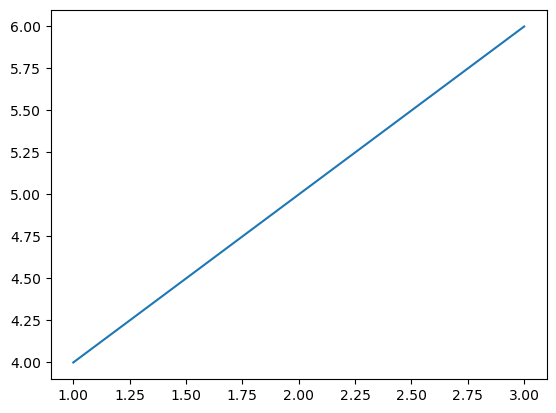

In [18]:
# Create a plot
plt.plot([1, 2, 3], [4, 5, 6])

# Convert the plot to a byte string
plot_bytes = io.BytesIO()
plt.savefig(plot_bytes, format='png')